In [67]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector

In [68]:
data = pd.read_csv('../raw_data/hospital_readmissions.csv')

# Function for Data-Cleaning

In [69]:
def make_clean_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df['diag_1'] != 'Missing']
    df = df[df['diag_2'] != 'Missing']
    df = df[df['diag_3'] != 'Missing']

    df['n_lab_procedures_grouped'] = (df['n_lab_procedures'] // 10).astype(int)
    df['n_medications_grouped'] = (df['n_medications'] // 5).astype(int)
    df['n_outpatient'] = df['n_outpatient'].map({0: 0, 1: 1}).fillna(2).astype(int)
    df['n_inpatient'] = df['n_inpatient'].map({0: 0, 1: 1}).fillna(2).astype(int)
    df['n_emergency'] = df['n_emergency'].map({0: 0, 1: 1}).fillna(2).astype(int)

    df = df.drop(columns=['n_lab_procedures',
                          'medical_specialty',
                          'glucose_test',
                          'n_medications'],
                )
    return df

# Pre-Processing Blocks

In [70]:
data_cleaner = FunctionTransformer(make_clean_data)

In [71]:
num_preproc = Pipeline([
    ('scaler', MinMaxScaler()),
])

In [72]:
cat_preproc = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False, drop="if_binary")),
])

In [73]:
preproc = ColumnTransformer([
    ('num_transf', num_preproc, make_column_selector(dtype_include='number')),
    ('cat_transf', cat_preproc, make_column_selector(dtype_include='object')),
], verbose_feature_names_out=False).set_output(transform='pandas')

# Full Pre-Processing Pipeline

In [74]:
pipe_preproc = Pipeline([
    ('data_cleaner', data_cleaner),
    ('preprocessor', preproc),
])

pipe_preproc

Pipeline(steps=[('data_cleaner',
                 FunctionTransformer(func=<function make_clean_data at 0x7f117aac27a0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_transf',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f117aabc6a0>),
                                                 ('cat_transf',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f117aabf310>)],
                                   verbose_feature_names_out=False))])

# check, that it works...

In [75]:
preproc_data = pipe_preproc.fit_transform(data)
preproc_data

,time_in_hospital,n_procedures,n_outpatient,n_inpatient,n_emergency,n_lab_procedures_grouped,n_medications_grouped,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,A1Ctest_high,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes,readmitted_yes
0,0.538462,0.166667,1.0,0.0,0.0,0.636364,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.153846,0.333333,0.0,0.0,0.0,0.272727,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.307692,0.000000,0.0,0.0,0.0,0.363636,0.200000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,0.076923,0.000000,0.5,0.0,0.0,0.272727,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.000000,0.000000,0.0,0.0,0.0,0.363636,0.066667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.000000,0.166667,0.0,0.0,0.0,0.636364,0.400000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
24996,0.076923,0.000000,0.0,0.0,0.0,0.545455,0.266667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
24997,0.307692,0.000000,0.0,0.5,0.0,0.090909,0.066667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24998,0.076923,0.500000,0.0,0.0,0.0,0.545455,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [76]:
preproc_data.columns

Index(['time_in_hospital', 'n_procedures', 'n_outpatient', 'n_inpatient',
       'n_emergency', 'n_lab_procedures_grouped', 'n_medications_grouped',
       'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)',
       'age_[80-90)', 'age_[90-100)', 'diag_1_Circulatory', 'diag_1_Diabetes',
       'diag_1_Digestive', 'diag_1_Injury', 'diag_1_Musculoskeletal',
       'diag_1_Other', 'diag_1_Respiratory', 'diag_2_Circulatory',
       'diag_2_Diabetes', 'diag_2_Digestive', 'diag_2_Injury',
       'diag_2_Musculoskeletal', 'diag_2_Other', 'diag_2_Respiratory',
       'diag_3_Circulatory', 'diag_3_Diabetes', 'diag_3_Digestive',
       'diag_3_Injury', 'diag_3_Musculoskeletal', 'diag_3_Other',
       'diag_3_Respiratory', 'A1Ctest_high', 'A1Ctest_no', 'A1Ctest_normal',
       'change_yes', 'diabetes_med_yes', 'readmitted_yes'],
      dtype='object')

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [78]:

X = preproc_data.drop('readmitted_yes', axis=1)
y = preproc_data['readmitted_yes']
model = LogisticRegression(max_iter=1000)
cv_results = cross_validate(model, X, y, cv=5)
accuracy= cv_results['test_score'].mean()
accuracy


0.6130187180997012

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 42)

In [80]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6121872477804681


In [82]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[2971  909]
 [1974 1580]]


In [83]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.77      0.67      3880
         1.0       0.63      0.44      0.52      3554

    accuracy                           0.61      7434
   macro avg       0.62      0.61      0.60      7434
weighted avg       0.62      0.61      0.60      7434



In [84]:
import shap

In [85]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

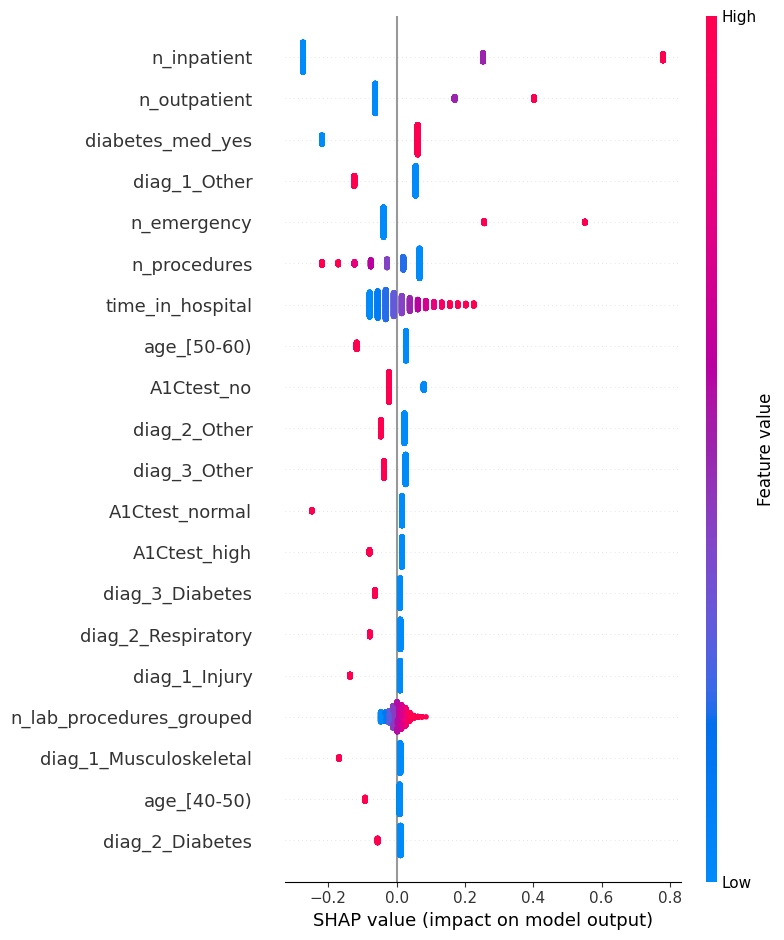

In [86]:
shap.summary_plot(shap_values, X_test)

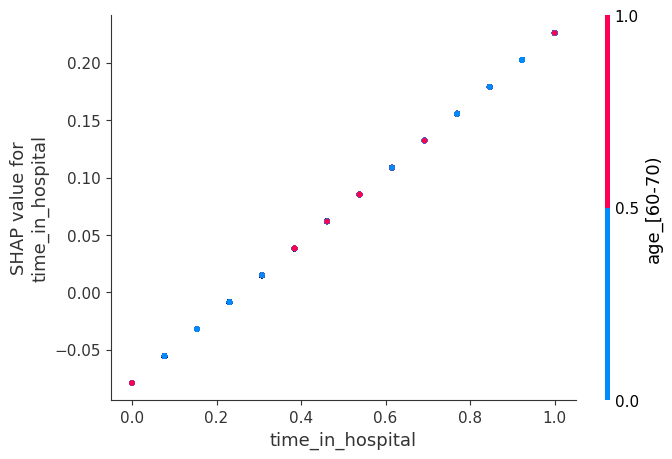

In [89]:
shap.initjs()

shap.dependence_plot('time_in_hospital', shap_values.values, X_test)

In [102]:
shap.plots.force(shap_values[80])
#shap.force_plot(explainer.expected_value, shap_values[0], X_test[0])

In [95]:
#stacked force plot
shap.plots.force(shap_values[0:100])

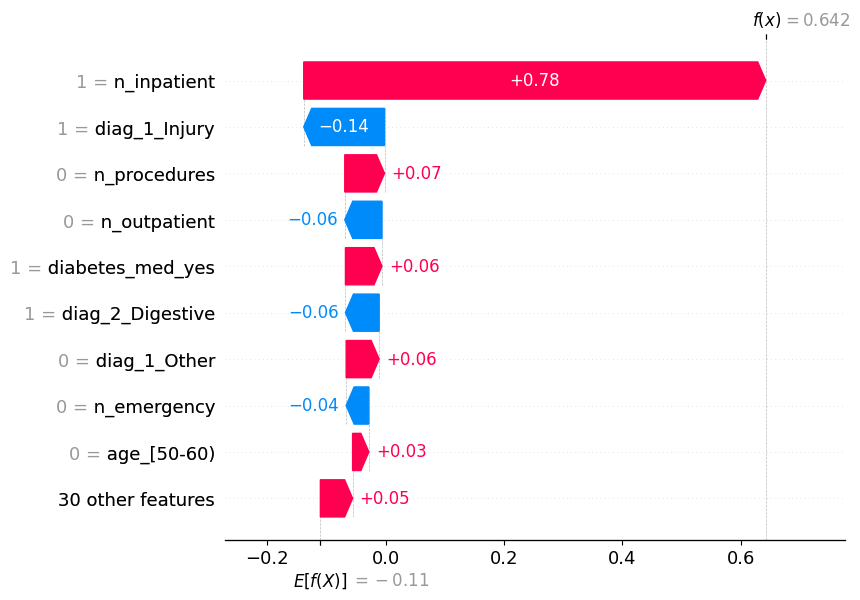

In [93]:
np.shape(shap_values.values)
shap.plots.waterfall(shap_values[0])

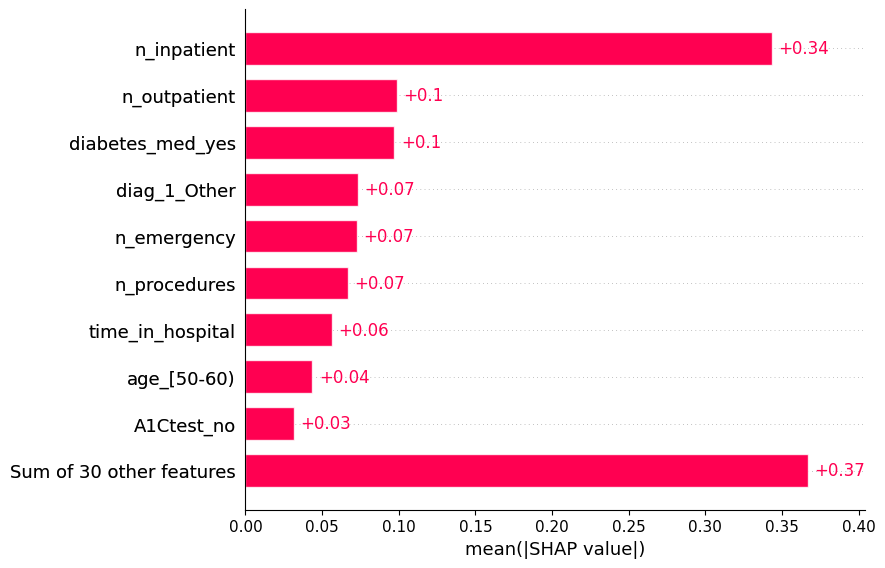

In [96]:
shap.plots.bar(shap_values)

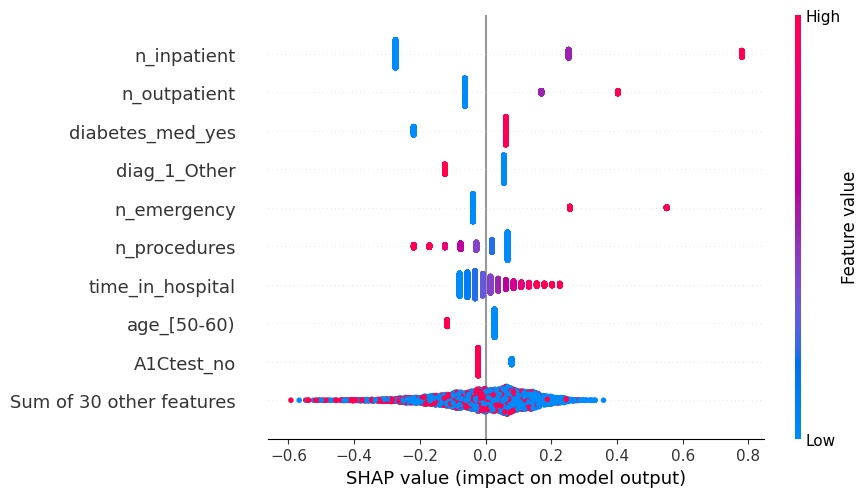

In [97]:
shap.plots.beeswarm(shap_values)

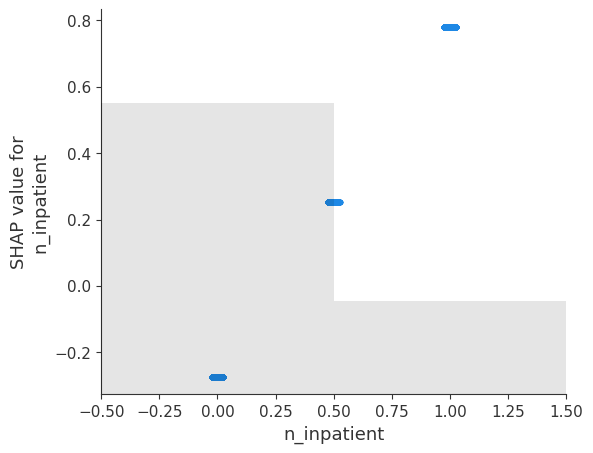

In [99]:
#Dependence Plot
#shap.plots.scatter(shap_values[:, "n_inpatient"])

In [ ]:
import pickle
with open('../models/log_reg_SHAP.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as pickle file.")

Model saved as pickle file.
